# Принятие решений в бизнесе на основе данных

## Постановка задачи

Будем выполнять аналитику для крупного интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.

Требуется приоритезировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Описание данных

Файл hypothesis.csv - краткое описание гипотезы и ее оценки по RICE.

Файл orders.csv - информация о заказах и группе A/B-теста, в которую попал заказ.

Файл visitors.csv - группированная информация о количестве пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез.

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Импортируем библиотеки, которые понадобятся нам в работе.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
pd.set_option('display.max_colwidth', 500)

Прочитаем файл с гипотезами в датафрейм и изучим его содержимое.

In [3]:
hypothesis = pd.read_csv('datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Имеем 9 гипотез и их оценки для фреймворков ICE и RICE. Приоритезируем гипотезы. Начнем с ICE.

In [4]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [5]:
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


С небольшим отрывом гипотеза со скидкой на день рождения.

Оценим гипотезы по RICE.

In [6]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [7]:
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Учет охвата пользователей, на которых повлияет изменение, увеличил разброс между результатами. Гипотеза с формой подписки на рассылку стала однозначным лидером. Используем ее для проведения A/B теста.

### Вывод

Были применены фреймворки ICE и RICE для приоритизации гипотез. Применение RICE вместо ICE позволило более явно выделить гипотезу, которую лучше всего проверить. Использование RICE предпочтительнее, так как важно учитывать не только силу гипотезы, но и сколько пользователей она охватит.

Выбранная гипотеза для проверки: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 



## Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Проанализируем A/B-тест. 


### Загрузка данных

Прочитаем в датафрейм файл с информацией о заказах и убедимся, что в данных нет проблем.

In [8]:
orders = pd.read_csv('datasets/orders.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропусков нет. Объем выборки достаточный, чтобы попробовать сделать выводы. Для даты скорректируем формат.

In [10]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

Прочитаем в датафрейм и изучим содержимое файла с посетителями интернет-магазина.

In [11]:
visitors = pd.read_csv('datasets/visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Похоже, тест длился месяц - на протяжении августа. Скорректируем формат даты.

In [13]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

Убедимся, что с датами все в порядке.

In [14]:
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Действительно данные за август. Приступим к анализу.

### Подготовка данных

Посчитаем ежедневное и на основе него кумулятивное количество посетителей для группы A.

In [15]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [16]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

Посчитаем ежедневное и кумулятивное количество посетителей для группы B.

In [17]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [18]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Посчитаем заказы и выручку: сначала ежедневное значение, затем кумулятивное. Для группы A.

In [19]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [20]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

Посчитаем ежедневные и кумулятивные показатели количества заказов и выручки для группы B.

In [21]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [22]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим данные в один датафрейм.

In [23]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Получили датафрейм со следующими столбцами:
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

### График кумулятивной выручки по группам

Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

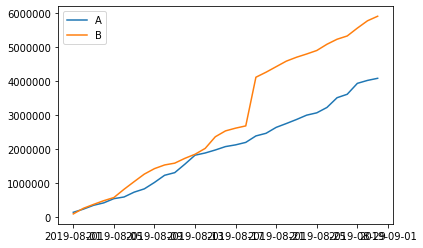

In [24]:
plt.plot(data['date'], data['revenueCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'], label='B')
plt.legend()

Выручка обеих групп растет с примерно одинаковой скоростью. При этом у группы B был скачок - возможно, это аномально большой заказ.


### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

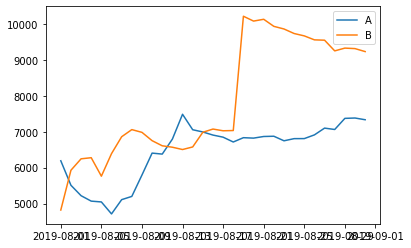

In [25]:
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.legend()

В группе B действительно есть всплеск - скорее всего там действительно был аномально дорогой заказ. Графики обеих групп имели выраженные колебания в начале эксперимента и менее выраженные в конце. Сделать вывод об установившемся значении нельзя.



### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека.

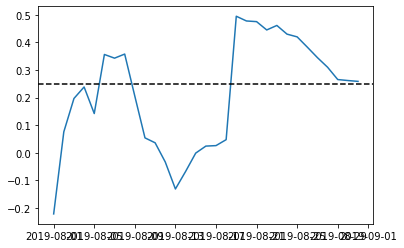

In [26]:
(plt.plot(data['date'], 
          (data['revenueCummulativeB']/data['ordersCummulativeB'])
          /(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)
)
plt.axhline(y=0.25, color='black', linestyle='--')

В последние дни эксперимента график стремится к значению в 0,25. Однако по нему невозможно однозначно определить, что одна из групп лучше. Скорее всего потребуется либо вычистить аномалии, либо продлить тест.



### График кумулятивной конверсии по группам

Добавим в датафрейм кумулятивную конверсию, поделив кумулятивное число заказов на кумулятивное число посетителей.

In [27]:
data['conversionCummulativeA'] = data['ordersCummulativeA'] / data['visitorsCummulativeA']

In [28]:
data['conversionCummulativeB'] = data['ordersCummulativeB'] / data['visitorsCummulativeB']

Проанализируем график кумулятивной конверсии.

['2019-08-01', '2019-08-31', 0, 0.045]

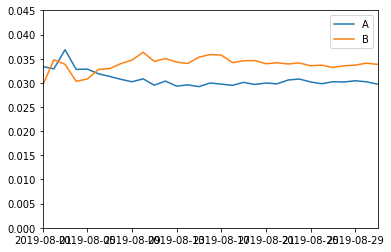

In [29]:
plt.plot(data['date'], data['conversionCummulativeA'], label='A')
plt.plot(data['date'], data['conversionCummulativeB'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.045])

Конверсия колебалась в начале эксперимента, затем зафиксировалась. Конверсия группы B стабильно выше, чем у группы A.



### График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного различия кумулятивных конверсий.

['2019-08-01', '2019-08-31', -0.3, 0.3]

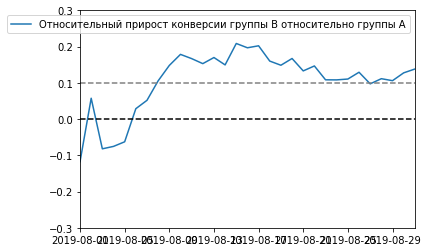

In [30]:
(plt.plot(data['date'], data['conversionCummulativeB']/data['conversionCummulativeA']-1, 
          label="Относительный прирост конверсии группы B относительно группы A")
)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3])

В начале теста наблюдаем колебания графика, затем группа B вырвалась вперёд. Отношение конверсии установилось, однако все равно стоит проанализировать аномалии, возможно, они изменят картину. Сделаем это далее.



### Точечный график количества заказов по пользователям

Посчитаем, сколько заказов пришлось на каждого пользователя.

In [31]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
                 .groupby('visitorId', as_index=False)
                 .agg({'transactionId' : pd.Series.nunique})
                )
ordersByUsers.columns = ['visitorId','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


11 заказов за месяц может оказаться аномалией. Рассмотрми подробнее на точечном графике.

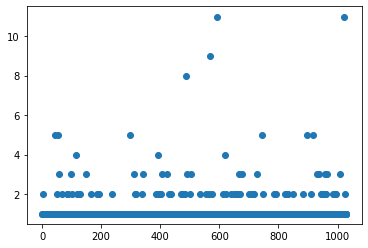

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

Выводы подтверждаются - 11 заказов действительно являются выбросами в данных. Непонятно, считать ли таковыми пользователей с 2-6 заказами. Точную долю сможем определить из перцентилей.

### Выбор границы для определения аномальных пользователей

Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [33]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей делали больше 2 заказов. И не более 1% пользователей заказывали больше 4 раз. В качестве границы определения аномальных пользователей возьмем 4 заказа.

### Точечный график стоимостей заказов

Оценим стоимость заказов.

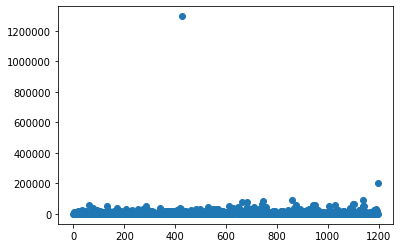

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Большинство пользователей совершали заказы в пределах 200 тысяч. Есть аномально большие - скорее всего они и повлияли на графики среднего чека. Точнее выделить аномалии сможем посчитав перцентили.



### Выбор границы для определения аномальных заказов

Определим 95 и 99 перцентили среднего чека в выборке.

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.2 рублей. В качестве границы для определения аномальных заказов выберем 99-й перцентиль, то есть чек в 58 233.2 рублей.



### Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различия в конверсии между группами по «сырым» данным. Нулевая гипотеза: статистически значимых различий в конверсии между группами A и B нет. Уровень статистической значимости примем 0,05.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [36]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

In [37]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [38]:
sampleA = (pd.concat([ordersByUsersA['orders'], pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
          )

In [39]:
sampleB = (pd.concat([ordersByUsersB['orders'], pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
          )

Применим критерий Манна-Уитни и выведем p-value.

In [40]:
stats.mannwhitneyu(sampleA, sampleB)[1]

0.008396177528376304

Полученное значение p-value меньше 0,05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

Оценим относительный прирост конверсии группы B.

In [41]:
sampleB.mean() / sampleA.mean() - 1

0.13807884655320146

Конверсия группы B выше на 13,8%, что является статистически значимым различием. Однако мы имели дело с сырыми данными, где мы уже обнаружили аномалии. Необходимо будет перепроверить гипотезу на отфильтрованных данных.



### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Оценим различия в среднем чеке между группами по «сырым» данным. Нулевая гипотеза: статистически значимых различий в среднем чеке заказа между группами A и B нет.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию Манна-Уитни данные о выручке с заказов.

In [42]:
stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

0.3646454927716229

Полученное p-value больше заданного порога значимости 0,05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Тем не менее, оценим относительные различия в среднем чеке между группами.

In [43]:
orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1

0.2587136699126005

В данном случае разница в 25% оказалась статистически незначимой. Проверим выводы еще раз, отфильтровав аномалии.



### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста. 

Ранее мы выбрали границу для среднего чека по 99-му перцентилю, равную 58 233.2 рублям. А 99-й перцентиль количества заказов на одного пользователя равен 4.

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58 233.2 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше либо равным 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58 233 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [44]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 4]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] >= 4]['visitorId']], axis = 0)

In [45]:
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorId']

In [46]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.shape

(20,)

Получили 20 пользователей с аномальным поведением. Подготовим выборки количества заказов по пользователям по группам теста.

In [47]:
sampleAFiltered = (
    pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], 
               pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                         name='orders')],axis=0)
)

In [48]:
sampleBFiltered = (
    pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
               pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                         name='orders')],axis=0)
)

Применим статистический критерий Манна-Уитни к полученным выборкам и рассчитаем относительный прирост конверсии группы B.

In [49]:
stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

0.006952495381214855

In [50]:
sampleBFiltered.mean() / sampleAFiltered.mean() - 1

0.15103304987438104

Получили схожие результаты. P-value несколько уменьшилось, отностельный прирост конверсии увеличился. По-прежнему отвергаем гипотезу об отсутствии статистически значимых различий. Конверсия группы B выше на 15,1%.



### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Проверим результаты по среднему чеку по «очищенным» данным. Применим критерий Манна-Уитни и найдем относительные различия в среднем чеке между группами.

In [51]:
stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]

0.47942353987323266

In [52]:
(orders[np.logical_and(
    orders['group']=='B',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / 
 orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)

-0.013852493303816549

P-value увеличился, а разница между группами уменьшилась с 25% до -1,3%. Нет причин отвергать гипотезу об отсутствии статистически значимых различий между средним чеком по группам.

Вычистив выбросы, мы не изменили результаты статистического теста, однако сделали их более точными.



### Принимаем решение

Выбранная гипотеза для проверки: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, - показала следующие результаты.

Мы не наблюдаем статистически значимой разницы между средним чеком в группах A и B, однако конверсия группы B выше на 15,1%. На основе этих данных мы можем останавливать тест и зафиксировать победу группы B. Справедливо, что email-рассылка может увеличить конверсию, но не влияет на средний чек.